# Libraries

In [48]:
import os
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics import r2_score

# visualization
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

# preprocessing
from sklearn.preprocessing import OneHotEncoder

---
# 3.25 Linear Regression

Fit a line to a data set of observations, and then use the line to predict unobserved values. Simple really.

![linear_regression](https://community.cloudera.com/t5/image/serverpage/image-id/25068iFF075A5AEC3B8528/image-size/medium?v=1.0&px=400)

The regression line are the predicted values, while the blue data points are the observed values.

OLS (ordinary least squares) - minimizes the sum of squared errors; this is a method for performing lin reg.

How to measure how well our line fits our data?
- **R-squared** (coefficient of determination) measures: **The fraction of the total variation in Y that is captured by the model**
- Ranges from 0 to 1
- 0 is bad, 1 is perfect

In [2]:
np.random.seed(0)

pageSpeeds = np.random.normal(3.0, 1.0, 1000)

purchaseAmount = 100 - (pageSpeeds + np.random.normal(0,0.1, 1000)) * 3

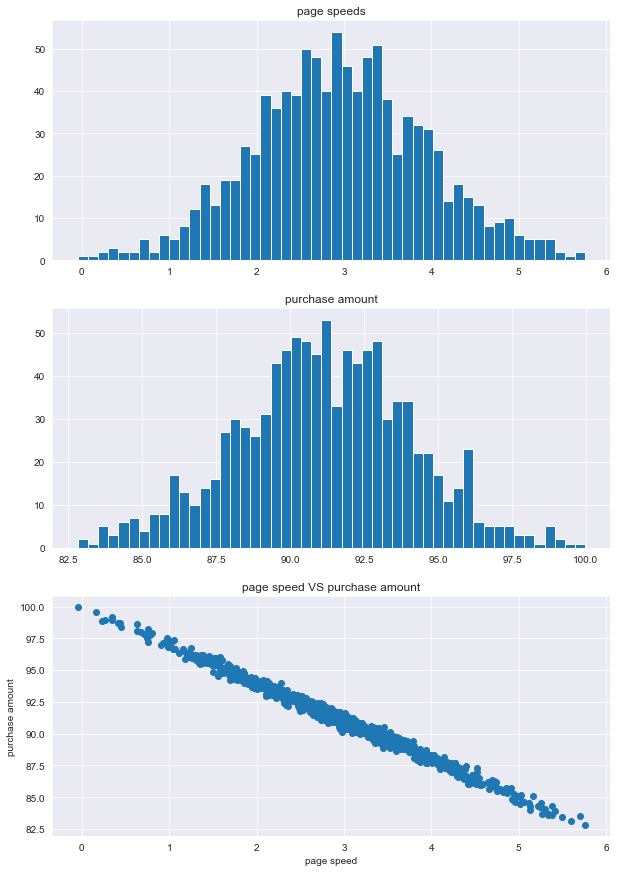

In [3]:
fig, ax = plt.subplots(3, 1, figsize=(10,15))

ax[0].hist(pageSpeeds, bins=50)
ax[0].set_title('page speeds')
ax[1].hist(purchaseAmount, bins=50)
ax[1].set_title('purchase amount')
ax[2].scatter(pageSpeeds, purchaseAmount)
ax[2].set_title('page speed VS purchase amount')
ax[2].set_xlabel('page speed')
ax[2].set_ylabel('purchase amount');

In [4]:
df = pd.DataFrame({'page_speed':pageSpeeds, 'purchase_amount':purchaseAmount})
df

,page_speed,purchase_amount
0,4.764052,85.541054
1,3.400157,89.531786
2,3.978738,88.190480
3,5.240893,84.245906
4,4.867558,85.328910
...,...,...
995,3.412871,89.732062
996,2.801601,91.174740
997,3.094192,90.669893
998,1.852389,94.785403


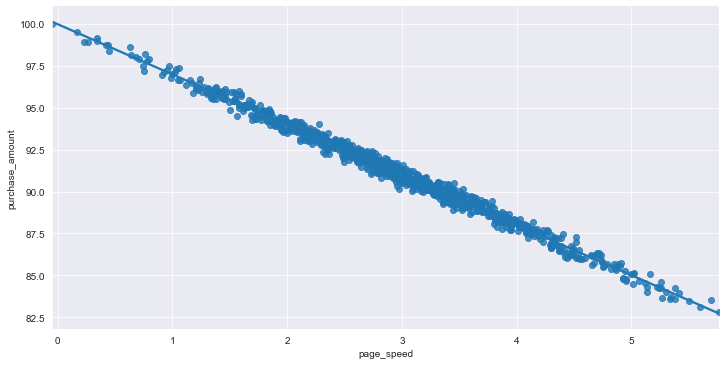

In [5]:
sns.lmplot(data=df, x='page_speed', y='purchase_amount', height=5, aspect=2);

In [6]:
slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)
print(f'slope=    {slope}\nintercept= {intercept}\nr_value=  {r_value})')

slope=    -2.990728259519358
intercept= 99.96851930491009
r_value=  -0.9951991104092175)


R-squared:

In [7]:
r_value ** 2

0.9904212693592979

Let's use the slope and intercept we got from the regression to plot predicted values vs. observed:

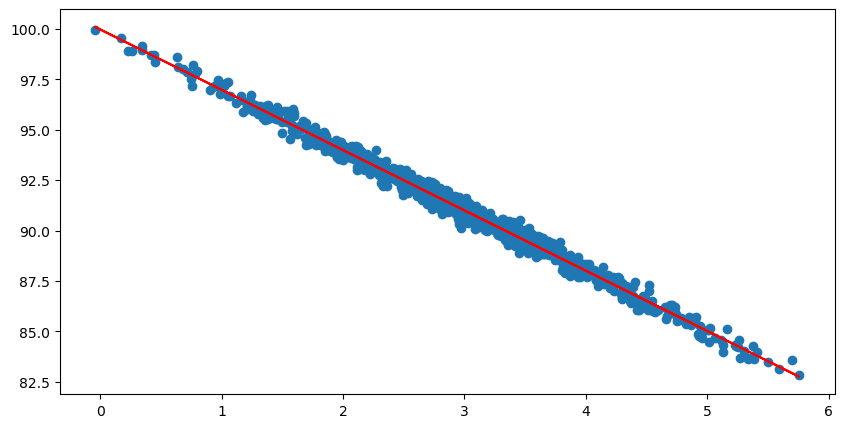

In [8]:
# def predict(x):
#     return slope * x + intercept

# fitLine = predict(pageSpeeds)

fitLine = [slope*x+intercept for x in pageSpeeds]

plt.rcdefaults()

plt.figure(figsize=(10,5))

plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, color='r');

### Activity Using Tips dataset

Think about breaking this into a separate repo/blog for linear regression. 

Do this section, and let's try redoing project 2 from flatiron.

Load tips data set via seaborn (it returns a pandas dataframe), and let's perform some lin regression

In [9]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [10]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


#### Total bill vs Tip

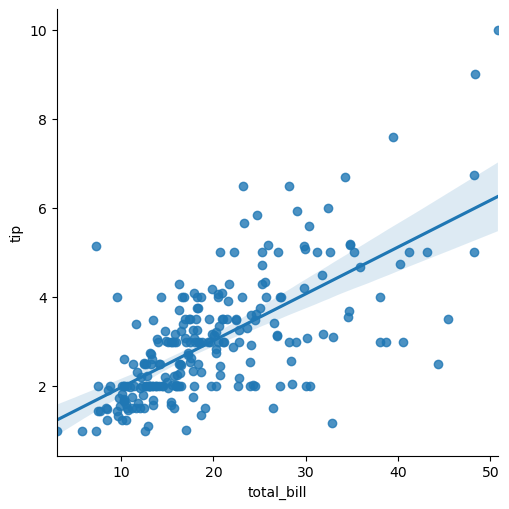

In [11]:
sns.lmplot(data=tips, x='total_bill', y='tip');

In [12]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x=tips.total_bill, y=tips.tip)
slope, intercept, r_value**2

(0.1050245173843534, 0.9202696135546726, 0.4566165863516758)

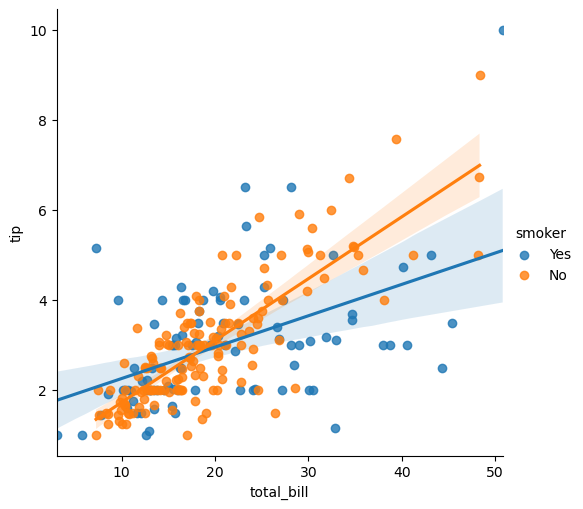

In [13]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker');

---
# 3.26 Polynomial Regression

- not all relationships are linear
- first order polynomial == linear formula --> $y = mx + b$
- second order polynomial --> $y = ax^2 + bx + c$
- third order polynomial --> $y = ax^3 + bx^2 + cx + d$
- As the order incureases, so does the complexity of the curve
- Too many degrees can lead to overfitting model to training data

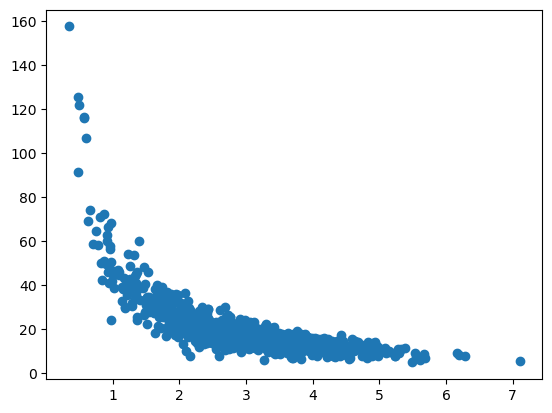

In [14]:
np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

plt.scatter(pageSpeeds, purchaseAmount);

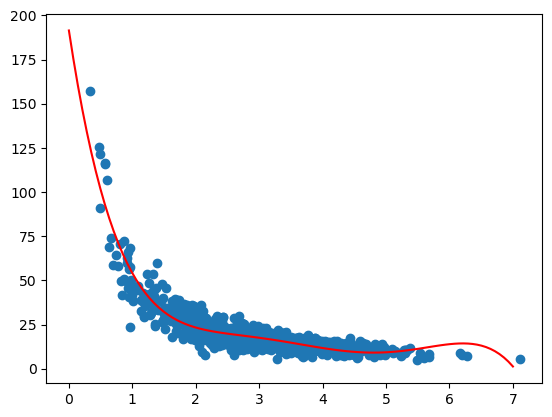

In [15]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

order = 5

polyfit = np.poly1d(np.polyfit(x, y, order))

xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, polyfit(xp), c='r');

In [16]:
r2 = r2_score(y,polyfit(x))
r2

0.8553884386186104

In [17]:
def polyfit(order):
    while order > 1:
        polyfit = np.poly1d(np.polyfit(x,y,order))
        r2 = r2_score(y,polyfit(x))
        print(f'{order} degree polynomial r2: {r2}')
        order -= 1
        
polyfit(4)

4 degree polynomial r2: 0.8293766396303073
3 degree polynomial r2: 0.7842354030823269
2 degree polynomial r2: 0.6927446350535892


Plotting diff functions in diff plots: 

https://towardsdatascience.com/creating-custom-plotting-functions-with-matplotlib-1f4b8eba6aa1

---

# 3.27 Predicting Car Prices

Multiple regression: Multiple independent variables. Example- predicting price of car based on body style, brand, mileage, etc.

Multi**variate** regression: Multiple dependent variables (things you're trying to predict)

Based on the EDA below, summary of plan to predict price:
- ohe Make, Type
- independent vars: mileage, make, type, cylinders, doors, cruise, leather
- re doors: once ohe type, and scale the df, see correlation between doors and type. this could be multcol.
- linreg price vs mileage, make, cylinders?

In [18]:
cars = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')
cars.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [19]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [20]:
cars.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [21]:
corr = cars.corr()
corr

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


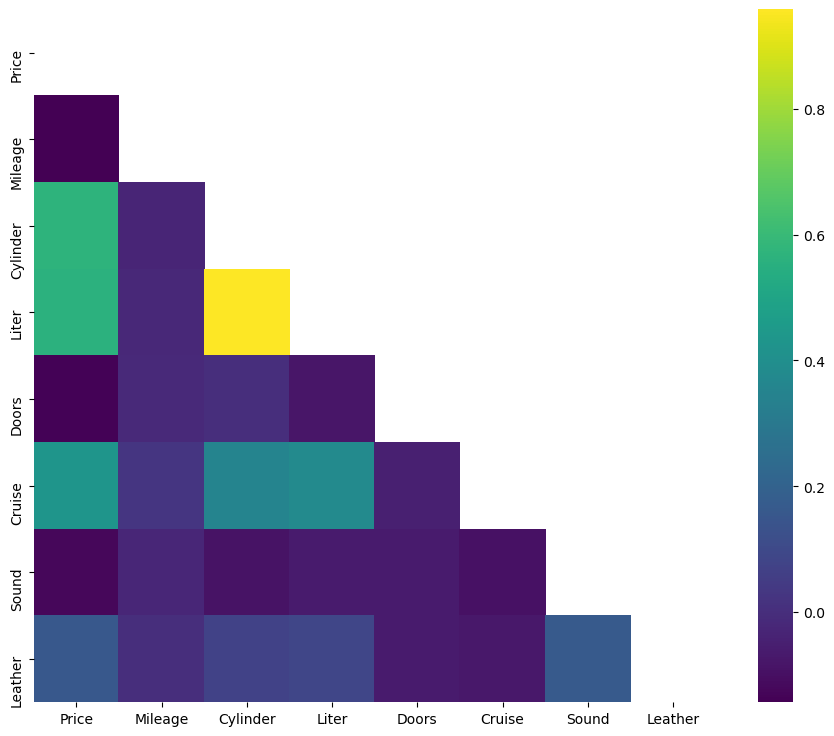

In [22]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax, cmap="viridis");

I'm surprised mileage isn't more correlated with price, so let's check it out below:

### Mileage vs Price

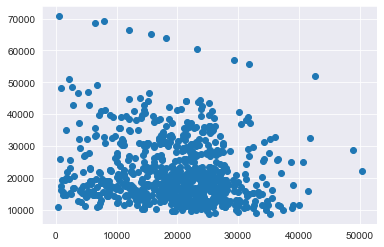

In [41]:
plt.scatter(cars.Mileage, cars.Price);

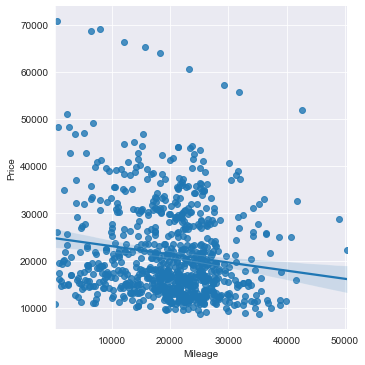

In [43]:
sns.lmplot(data=cars, x='Mileage', y='Price');

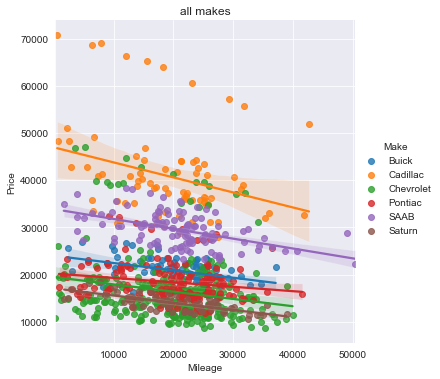

In [30]:
# LM Plot for the entire price vs mileage data

sns.lmplot(data=cars, x='Mileage', y='Price', hue='Make')
plt.title('all makes');

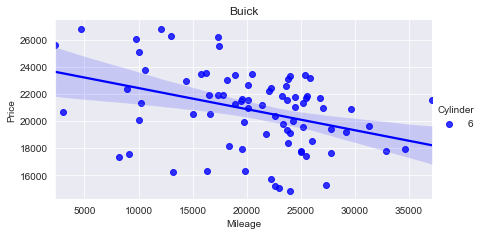

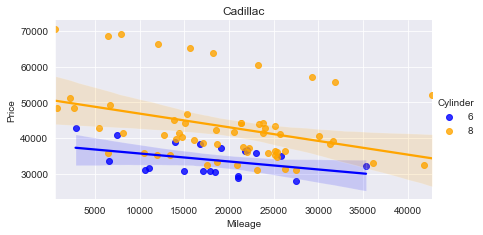

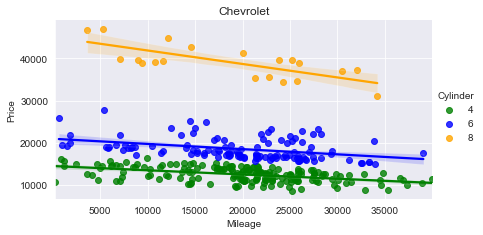

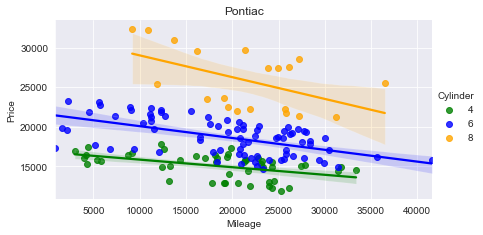

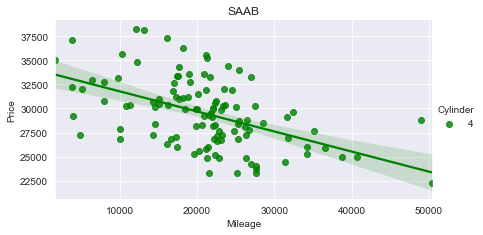

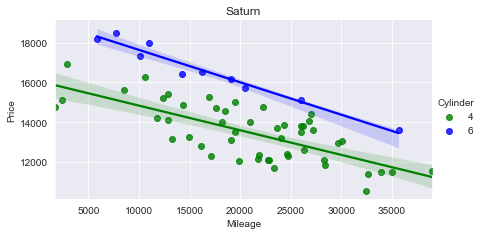

In [31]:
# LM Plot, by make, Milieage vs Price

car_makes = ['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn']

for car_make in car_makes:
    sns.lmplot(data=cars[cars.Make == car_make], x='Mileage', y='Price', height=3, aspect=2, 
               hue='Cylinder', palette={4:'g', 6:'b', 8:'orange'}) 
    plt.title(car_make);

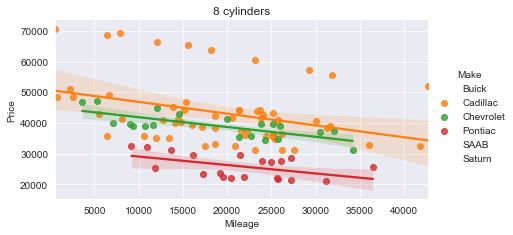

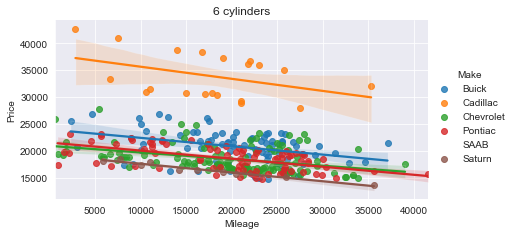

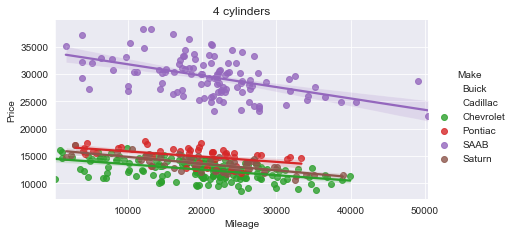

In [32]:
cylinders = [8, 6, 4]

for cylinder in cylinders:
    sns.lmplot(data=cars[cars.Cylinder == cylinder], x='Mileage', y='Price', height=3, aspect=2, hue='Make',
               hue_order=car_makes)
    plt.title(f'{cylinder} cylinders');

So there IS a correlation between mileage and price,

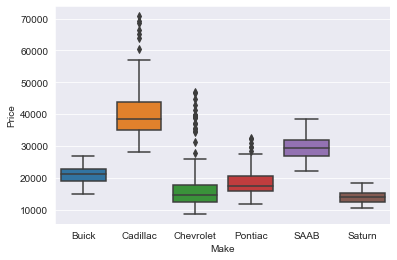

In [34]:
sns.boxplot(data=cars, x='Make', y='Price');

So, cruise and cylinder, both numerical values, have a relatively high positive correlation with price.

Let's look at type (categorical) and doors (numerical) real quick. 

I'm thinking ohe the categoricals, and then scale, and then we can do the linear regression.

Also, do a linear regression individually against features, and then altogether. And compare the difference.

In [35]:
cars.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [40]:
cars.Trim.value_counts().head()

# discard this feature.

Sedan 4D       170
Coupe 2D        50
LS Sedan 4D     50
LT Sedan 4D     30
LS Coupe 2D     30
Name: Trim, dtype: int64

In [39]:
cars.Type.unique()

array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)

### New df with isolated features

In [53]:
carsLinreg_df = cars[['Price', 'Mileage', 'Make', 'Type', 'Cylinder', 'Doors', 'Cruise', 'Leather']]
carsLinreg_df.sample(20)

,Price,Mileage,Make,Type,Cylinder,Doors,Cruise,Leather
16,19105.130124,24008,Buick,Sedan,6,4,1,0
501,23102.022367,5653,Pontiac,Sedan,6,4,1,0
71,26060.335350,9795,Buick,Sedan,6,4,1,0
57,19425.848616,27839,Buick,Sedan,6,4,1,0
202,10897.076506,6699,Chevrolet,Hatchback,4,4,0,1
59,19641.741902,31324,Buick,Sedan,6,4,1,1
114,37510.253570,21593,Cadillac,Sedan,8,4,1,1
711,30661.260150,14278,SAAB,Wagon,4,4,1,1
229,11149.618304,34447,Chevrolet,Coupe,4,2,1,1
152,69133.731722,7892,Cadillac,Convertible,8,2,1,1


In [68]:
carsLinreg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Type      804 non-null    object 
 4   Cylinder  804 non-null    int64  
 5   Doors     804 non-null    int64  
 6   Cruise    804 non-null    int64  
 7   Leather   804 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 50.4+ KB


## OHE Make & Type

In [49]:
carsLinreg_df.Make.unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [50]:
carsLinreg_df.Type.unique()

array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)

#### OHE Make- without dropping any cols

I'm going to add this back to the linreg_df and see correlation matrix

In [86]:
ohe = OneHotEncoder()

oheMake = ohe.fit_transform(carsLinreg_df[['Make']])
oheMake.todense()

matrix([[1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.]])

In [87]:
ohe.get_feature_names()

array(['x0_Buick', 'x0_Cadillac', 'x0_Chevrolet', 'x0_Pontiac', 'x0_SAAB',
       'x0_Saturn'], dtype=object)

In [88]:
oheMake_df = pd.DataFrame(oheMake.todense(), 
                          index=carsLinreg_df.index, 
                          columns=ohe.get_feature_names(carsLinreg_df[['Make']].columns))

oheMake_df

,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
799,0.0,0.0,0.0,0.0,0.0,1.0
800,0.0,0.0,0.0,0.0,0.0,1.0
801,0.0,0.0,0.0,0.0,0.0,1.0
802,0.0,0.0,0.0,0.0,0.0,1.0
